In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch

bulk = torch.load('./result/Metabric_20240924_115526/bulk_tensor.pt', map_location=torch.device('cpu'))
bulk = pd.DataFrame(bulk.numpy())

In [2]:
bulk

,0,1,2,3,4,5,6,7,8,9,...,17716,17717,17718,17719,17720,17721,17722,17723,17724,17725
0,0.350000,0.283371,0.180872,0.223439,0.213462,0.373761,0.185655,0.326279,0.264998,0.297379,...,0.417909,0.251339,0.158717,0.179973,0.191415,0.212036,0.255099,0.361458,0.338527,0.200462
1,0.253140,0.253674,0.330625,0.379125,0.229722,0.376709,0.171959,0.339668,0.255085,0.350573,...,0.127025,0.225642,0.258179,0.348403,0.226183,0.218434,0.128155,0.142380,0.298300,0.324532
2,0.245697,0.112579,0.140841,0.209119,0.167153,0.104707,0.138638,0.168593,0.198914,0.190821,...,0.198428,0.179802,0.207587,0.218290,0.198515,0.180599,0.203628,0.219535,0.171523,0.266253
3,0.288179,0.171652,0.124898,0.228529,0.213079,0.201848,0.186523,0.173071,0.186622,0.199774,...,0.254174,0.268679,0.267293,0.198251,0.300447,0.207032,0.054711,0.149086,0.151634,0.156639
4,0.114090,0.175028,0.157191,0.152517,0.131033,0.110559,0.112563,0.110161,0.116111,0.146785,...,0.142448,0.152826,0.167126,0.163841,0.108947,0.155078,0.139785,0.088358,0.165215,0.131241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,0.451241,0.326234,0.348256,0.418344,0.331772,0.455759,0.404824,0.435231,0.357649,0.459922,...,0.721903,0.315181,0.371536,0.430464,0.355277,0.295720,0.529772,0.405607,0.425436,0.563915
1462,0.325543,0.225983,0.349676,0.258429,0.159782,0.135548,0.207065,0.228191,0.294600,0.193606,...,0.168927,0.268551,0.349993,0.302545,0.342810,0.233794,0.287245,0.199641,0.322757,0.209509
1463,0.321498,0.399975,0.399888,0.398169,0.343611,0.437586,0.395118,0.311629,0.340888,0.447088,...,0.283529,0.306869,0.466111,0.351124,0.267384,0.331598,0.404397,0.315318,0.409332,0.258500
1464,0.212562,0.203656,0.449954,0.240769,0.205398,0.218866,0.211818,0.221601,0.230525,0.126671,...,0.217505,0.217233,0.267136,0.370180,0.332129,0.260251,0.203214,0.189346,0.265115,0.225171


In [3]:
def umap_show(data):

    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data.T).T

    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
    embedding_umap = reducer.fit_transform(data_scaled)
    
    plt.figure(figsize=(8,6))
    plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], s=10, cmap='Spectral')
    plt.title('UMAP projection of gene expression data')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.show()


In [4]:
def tsne_show(data):
    tsne = TSNE(n_components=2, random_state=42)
    embedding_tsne = tsne.fit_transform(data)
    
    plt.figure(figsize=(8,6))
    plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], s=10, cmap='Spectral')
    plt.title('t-SNE projection of gene expression data')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.show()


In [5]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def hierarchical_clustering(df, metric, method):

    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
    

    distance_matrix = sch.distance.pdist(df_scaled, metric= metric)

    print(distance_matrix)
    

    linkage_matrix = sch.linkage(distance_matrix, method= method)

    print(linkage_matrix)
    

    plt.figure(figsize=(10, 7))
    sch.dendrogram(linkage_matrix, labels=df.index, orientation='top')
    plt.title('Dendrogram')
    plt.xlabel('Sample')
    plt.ylabel('Distance')
    plt.show()


In [6]:
import torch

embedding = torch.load('./result/Metabric_20240924_115526/embedding.pt', map_location=torch.device('cpu'))
embedding = pd.DataFrame(embedding.numpy())

In [7]:
embedding

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-0.959270,0.295313,-1.743194,-0.304032,-0.124078,-1.927564,-1.599470,1.339297,0.087824,2.882639,...,0.736629,3.107835,-2.070086,0.852590,1.282167,-0.232189,-2.821267,-2.769155,1.829719,-1.749336
1,-4.196325,-1.018837,-2.250852,-0.482350,-1.404110,1.908535,-0.267752,2.419706,-1.906215,-1.038536,...,-0.473093,0.087190,-0.137367,1.193424,1.743461,1.215254,0.844605,0.930491,-0.441394,2.782943
2,-1.908137,2.536307,-2.292048,2.758788,-1.641740,-1.546482,3.791039,-2.180906,0.805502,1.336100,...,0.834432,2.417257,0.561384,-1.092285,3.507405,-1.481252,-2.689940,-0.643438,0.320850,-1.311219
3,-1.255898,2.054999,-2.822562,2.633151,-1.528633,-1.005341,3.009556,-2.134177,0.267801,1.644774,...,0.687942,2.705097,-0.327064,-0.478045,3.420385,-0.829522,-3.491291,-0.153971,0.925553,-0.897231
4,-3.122373,2.402251,-0.373109,-0.905428,-1.027582,-3.252918,3.109067,-0.399068,2.287150,2.533322,...,0.470225,0.272782,3.355309,-1.416875,1.173306,-1.285971,0.473516,-3.487460,-0.104041,-4.034204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,-0.019269,-1.729691,-0.123740,-0.433909,-1.370497,0.979735,-0.563266,1.945054,-2.249108,-1.635796,...,-0.937930,0.533588,-0.993651,1.309787,3.713642,1.006727,0.528788,-1.087680,1.402929,-1.146208
1462,-3.568382,-1.253487,-2.612799,-0.975597,-1.792352,1.163717,0.383542,2.340685,-1.345047,-1.152470,...,-0.763258,0.870708,-0.866568,0.852618,1.979960,1.265552,-0.756593,0.408755,0.616357,2.289586
1463,0.622486,2.692468,0.824367,-0.406705,-0.208075,1.959845,0.851744,-1.790333,-0.648456,-0.209700,...,0.387356,-0.257770,1.704275,3.180807,0.755034,3.448905,-0.735576,0.100341,0.756257,-0.634717
1464,-2.417746,0.037295,-2.834834,0.160097,-2.326127,0.248739,1.698664,0.572880,-0.840273,-0.052296,...,-0.283870,2.274634,-1.472303,-0.220644,3.294699,0.621282,-2.380943,0.752057,1.017413,1.312833


c:\users\zhengzh\appdata\local\programs\python\python38\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\zhengzh\AppData\Local\Temp\ipykernel_14112\617476752.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], s=10, cmap='Spectral')


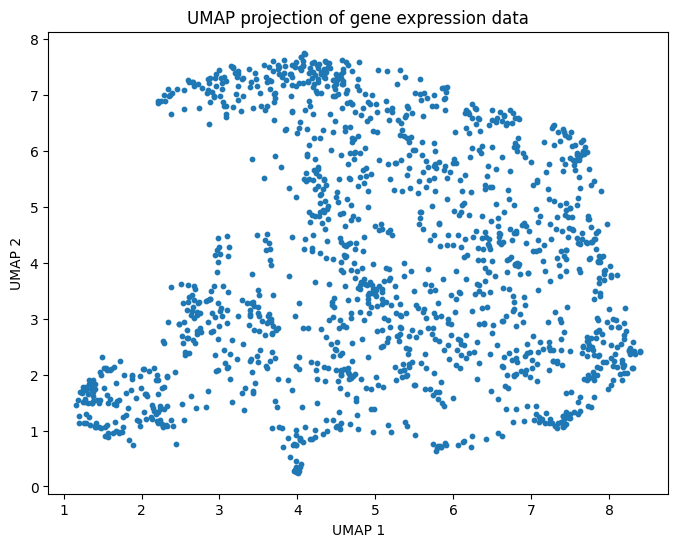

c:\users\zhengzh\appdata\local\programs\python\python38\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\zhengzh\AppData\Local\Temp\ipykernel_14112\617476752.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], s=10, cmap='Spectral')


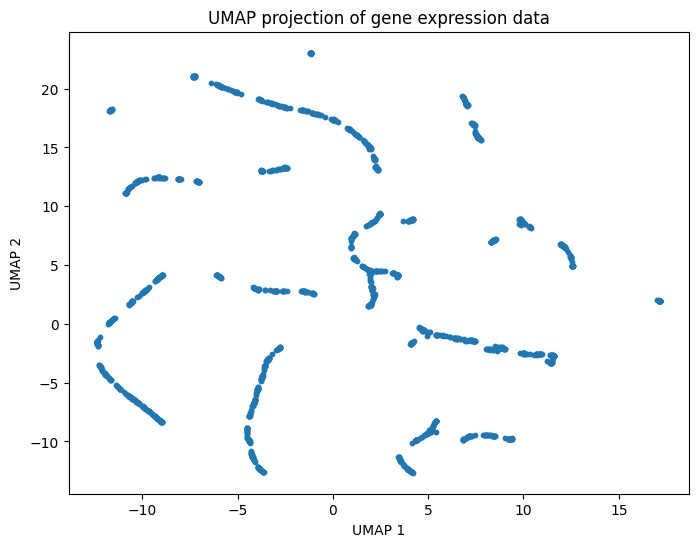

(None, None)

In [8]:
# original data exp and embedding after barlow_twins
umap_show(bulk), umap_show(embedding)

C:\Users\zhengzh\AppData\Local\Temp\ipykernel_14112\1245652910.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], s=10, cmap='Spectral')


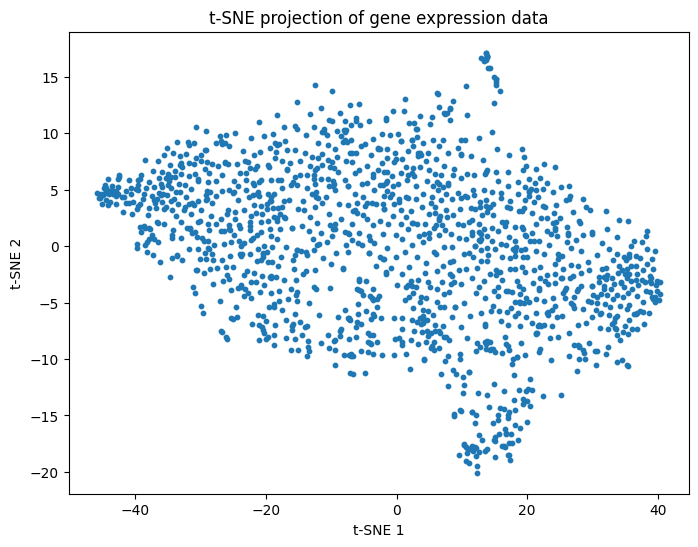

C:\Users\zhengzh\AppData\Local\Temp\ipykernel_14112\1245652910.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], s=10, cmap='Spectral')


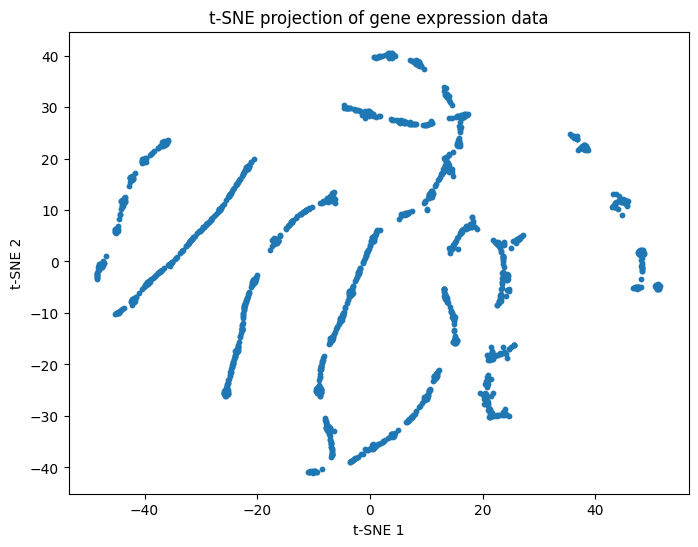

(None, None)

In [9]:
# original data exp and embedding after barlow_twins
tsne_show(bulk), tsne_show(embedding)

[1.07401716 0.95517285 0.9634105  ... 0.95722242 1.01269538 1.15097289]
[[6.00000000e+00 3.30000000e+01 1.77751907e-01 2.00000000e+00]
 [8.00000000e+00 2.80000000e+01 1.95132454e-01 2.00000000e+00]
 [1.50000000e+01 1.46700000e+03 2.04962368e-01 3.00000000e+00]
 ...
 [2.92100000e+03 2.92500000e+03 9.95659069e-01 6.40000000e+02]
 [2.92400000e+03 2.92700000e+03 1.01017272e+00 8.26000000e+02]
 [2.92800000e+03 2.92900000e+03 1.03499729e+00 1.46600000e+03]]


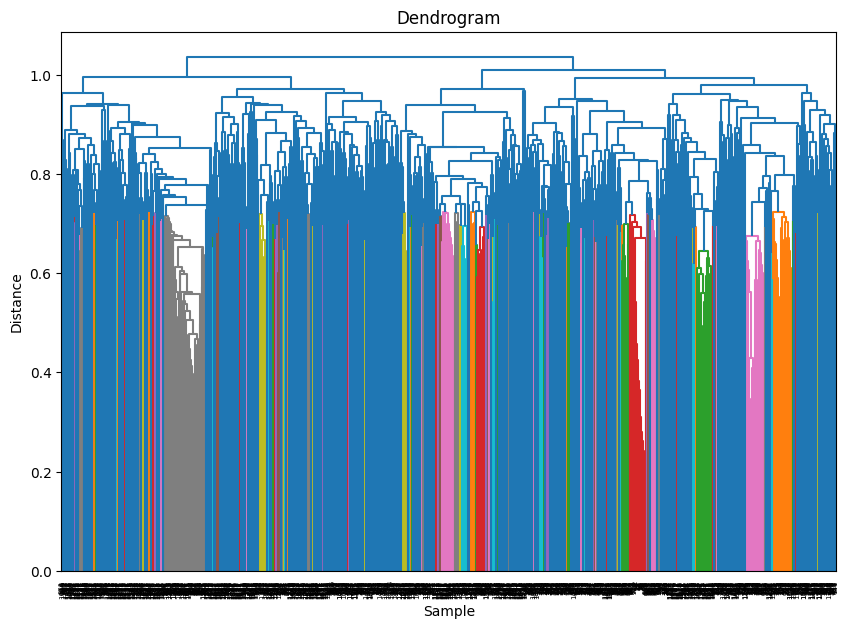

In [10]:
# original
hierarchical_clustering(bulk, metric = 'correlation', method = 'average')

[1.32820803 0.96638067 0.77852643 ... 1.17987634 1.17409821 1.41588726]
[[4.00000000e+00 1.08200000e+03 6.51023812e-06 2.00000000e+00]
 [4.82000000e+02 1.44300000e+03 1.40539225e-05 2.00000000e+00]
 [2.48000000e+02 4.43000000e+02 1.53031383e-05 2.00000000e+00]
 ...
 [2.92100000e+03 2.92400000e+03 1.05072885e+00 5.22000000e+02]
 [2.92200000e+03 2.92700000e+03 1.07019970e+00 9.44000000e+02]
 [2.92800000e+03 2.92900000e+03 1.08815074e+00 1.46600000e+03]]


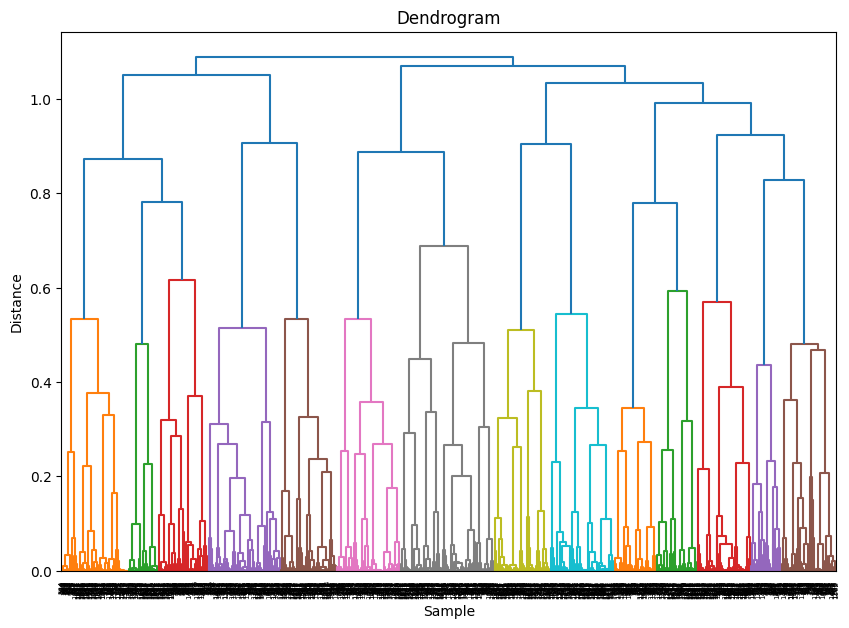

In [11]:
# after barlow twins
hierarchical_clustering(embedding, metric = 'correlation', method = 'average')

[1.07401716 0.95517285 0.9634105  ... 0.95722242 1.01269538 1.15097289]
[[6.00000000e+00 3.30000000e+01 1.77751907e-01 2.00000000e+00]
 [8.00000000e+00 2.80000000e+01 1.95132454e-01 2.00000000e+00]
 [1.50000000e+01 1.46700000e+03 2.08219200e-01 3.00000000e+00]
 ...
 [2.92600000e+03 2.92700000e+03 7.56907460e+00 1.00400000e+03]
 [2.91500000e+03 2.92500000e+03 8.19936991e+00 4.62000000e+02]
 [2.92800000e+03 2.92900000e+03 8.97654065e+00 1.46600000e+03]]


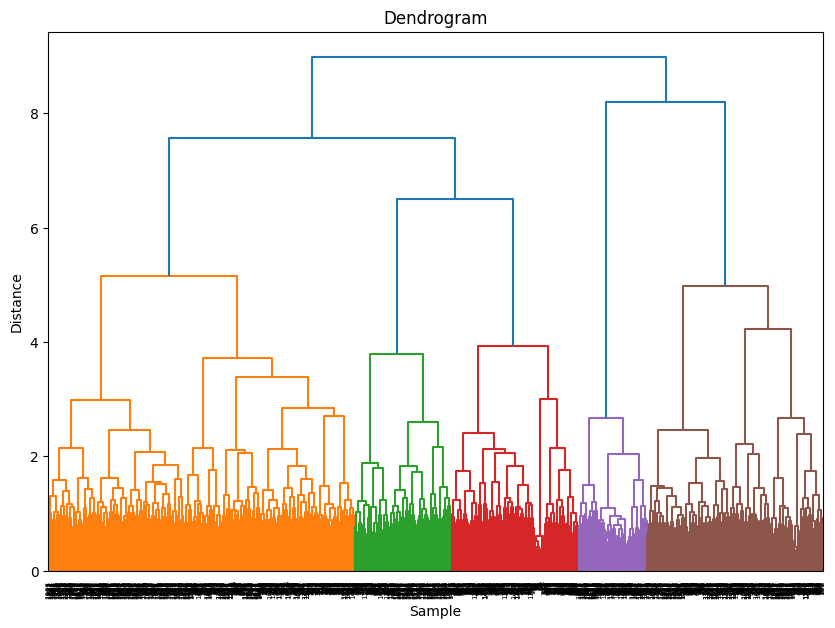

In [12]:
# original
hierarchical_clustering(bulk, metric = 'correlation', method = 'ward')

[1.32820803 0.96638067 0.77852643 ... 1.17987634 1.17409821 1.41588726]
[[4.00000000e+00 1.08200000e+03 6.51023812e-06 2.00000000e+00]
 [4.82000000e+02 1.44300000e+03 1.40539225e-05 2.00000000e+00]
 [2.48000000e+02 4.43000000e+02 1.53031383e-05 2.00000000e+00]
 ...
 [2.92300000e+03 2.92700000e+03 1.20767721e+01 7.49000000e+02]
 [2.92500000e+03 2.92800000e+03 1.41726893e+01 1.10300000e+03]
 [2.92400000e+03 2.92900000e+03 1.52256802e+01 1.46600000e+03]]


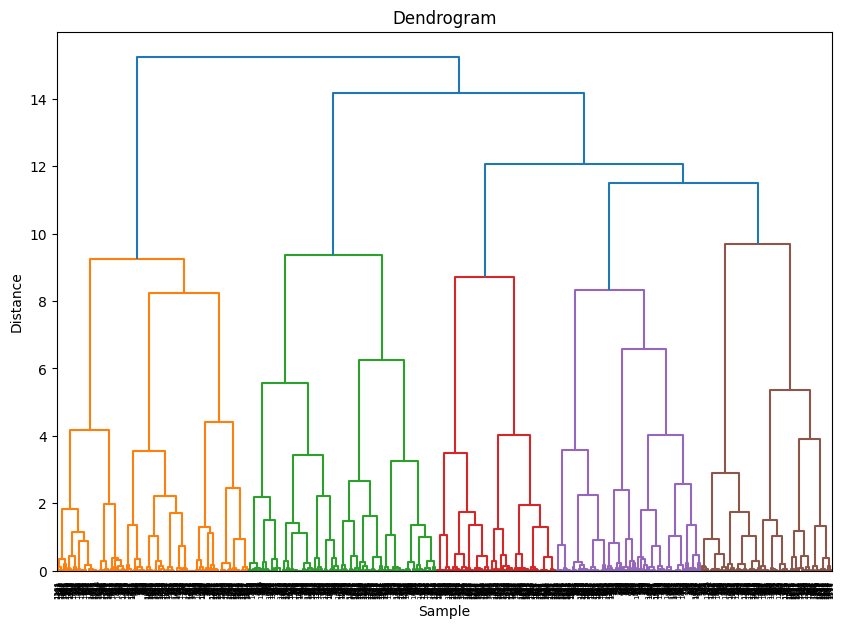

In [13]:
# after barlow twins
hierarchical_clustering(embedding, metric = 'correlation', method = 'ward')